In [7]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
iris = load_iris()

In [15]:
# X = pd.DataFrame(iris.data)
# X.columns = iris.feature_names

X = iris.data
y = iris.target

In [17]:
X.shape

(150, 4)

<Axes: >

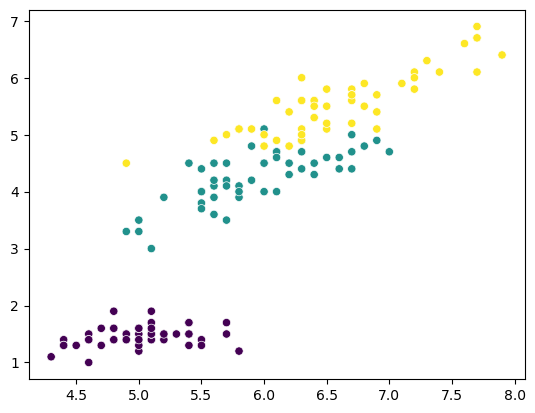

In [20]:
# Visualize
sns.scatterplot(x=X[:,0], y=X[:,2], c=y)    #not accurate visualize because data is 4dim

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# optimal - dimensionality reduction using PCA (later study)

In [28]:
# Elbow Method
wcss =[]

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known

<Axes: >

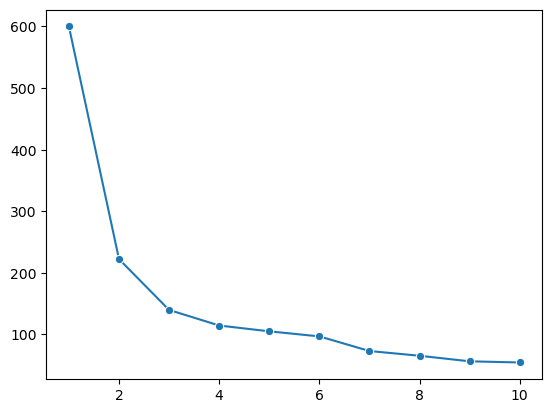

In [30]:
sns.lineplot(x=range(1, 11), y=wcss, marker='o')

C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

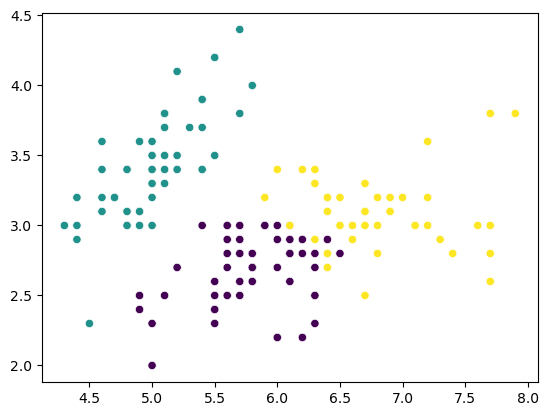

In [39]:
# Kmeans

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X[:, 0], y=X[:, 1], c=labels)

In [37]:
# PCA use
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # merge all features to 2

pca_data = pca.fit_transform(X_scaled)

C:\Users\ranja\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

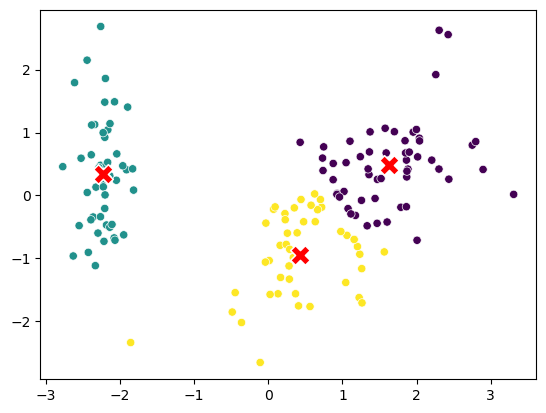

In [46]:
# Kmeans using pca data

kmeans = KMeans(n_clusters=3, random_state=10)
labels = kmeans.fit_predict(pca_data)

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], c=labels)
# centroid location
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', c="red", s=200)